In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)
np.set_printoptions(suppress=True) # Don't print scietific numbers form

In [2]:
data1 = loadmat('ex6/ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

# 1 Support Vector Machines

1.1 Example Dataset 1

In [3]:
def plot_dataset( X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes = None ):

    pos = y[:,0] == 1
    neg = y[:,0] == 0

    if axes == None:
        axes = plt.gca()

    axes.scatter(X[pos][:,0], X[pos][:,1], marker='+', c='k', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='y', s=50, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])

    axes.set_xlabel(xlabel, fontsize = 13)
    axes.set_ylabel(ylabel, fontsize = 13)

    axes.legend( bbox_to_anchor=(1.0, 1.0),  fancybox = True ) # scatterpoints = 1 set in matplotlibrc

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


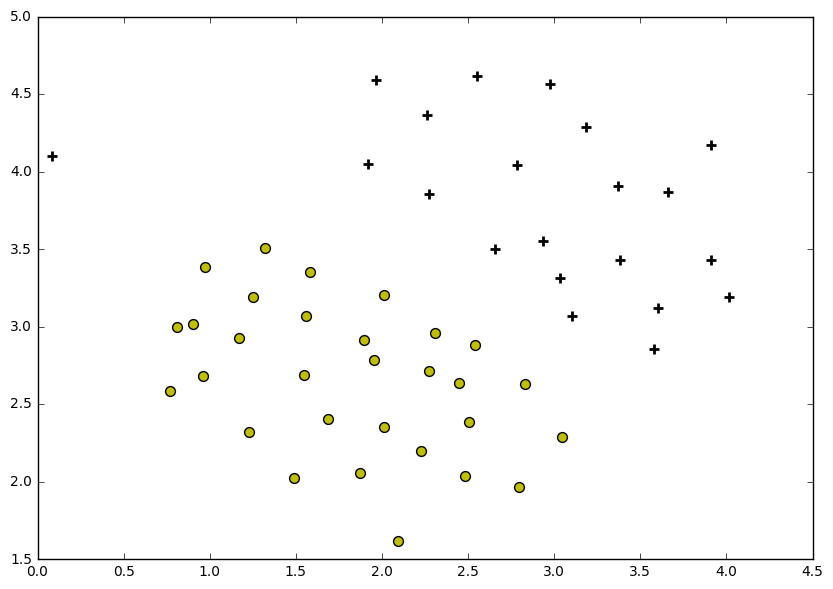

In [4]:
plot_dataset( data1['X'], data1['y'], '', '', '', '', 0, 4.5, 1.5, 5 )

In [5]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C = 1.0, decision_function_shape = 'ovr')
clf.fit( data1['X'], data1['y'].ravel() )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


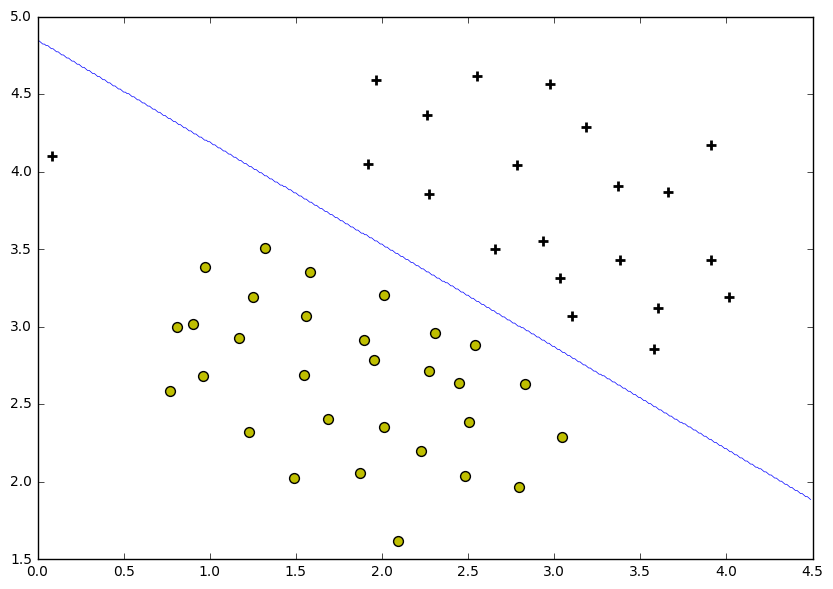

In [6]:
plot_dataset( data1['X'], data1['y'], '', '', '', '', 0, 4.5, 1.5, 5 )

xx1, xx2 = np.meshgrid( np.arange(0.0, 4.5, 0.01), np.arange(1.5, 5.0, 0.01) )
Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')

In [7]:
clf100 = svm.SVC(kernel = 'linear', C = 100.0, decision_function_shape = 'ovr')
clf100.fit( data1['X'], data1['y'].ravel() )

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


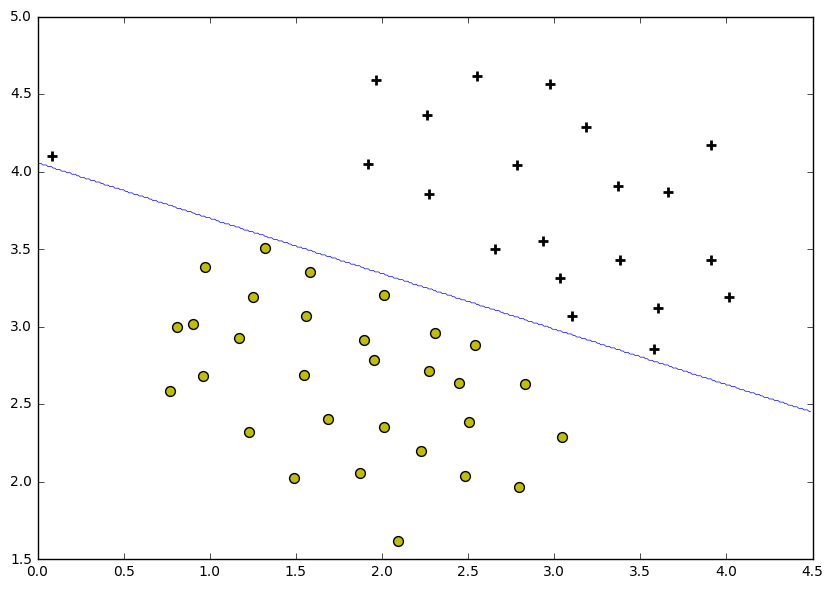

In [8]:
plot_dataset( data1['X'], data1['y'], '', '', '', '', 0, 4.5, 1.5, 5 )

xx1, xx2 = np.meshgrid( np.arange(0.0, 4.5, 0.01), np.arange(1.5, 5.0, 0.01) )
Z = clf100.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')

# 1.2 SVM with Gaussian Kernels

1.2.1 Gaussian Kernel

In [9]:
def gaussian_kernel( x1, x2, sigma ):
    x1 = np.asarray( x1 )
    x2 = np.asarray( x2 )
    return np.exp( np.dot(x1 - x2, x1 - x2)/(-2 * np.square(sigma)) )

In [10]:
x1 = [1, 2, 1]; x2 = [0, 4, -1]; sigma = 2;
sim = gaussian_kernel(x1, x2, sigma);
print(sim)

0.324652467358


1.2.2 Example Dataset 2

In [11]:
data2 = loadmat('ex6/ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


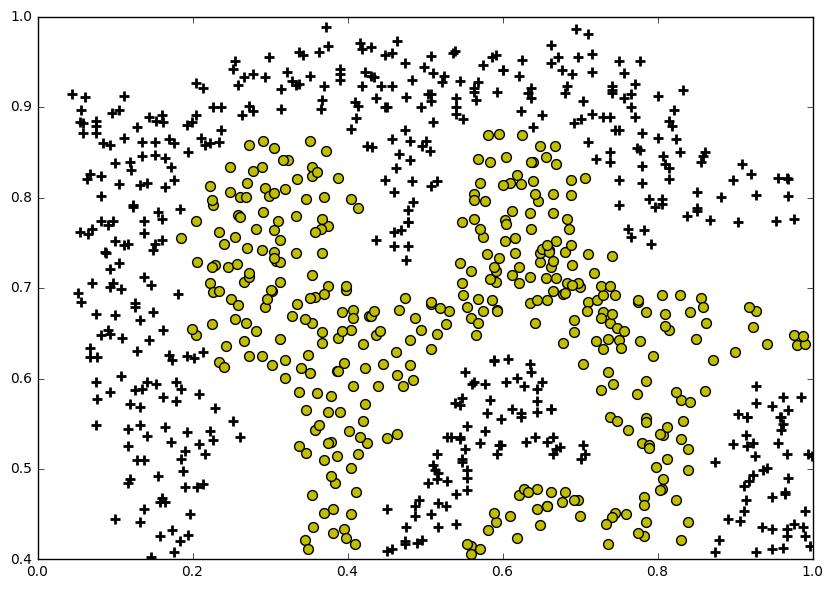

In [12]:
plot_dataset( data2['X'], data2['y'], '', '', '', '', 0, 1, 0.4, 1 )

In [13]:
sigma = 0.1
clf_g = svm.SVC(kernel = 'rbf', gamma = 1/(2*sigma**2), C = 1.0, decision_function_shape = 'ovr')
clf_g.fit( data2['X'], data2['y'].ravel() )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


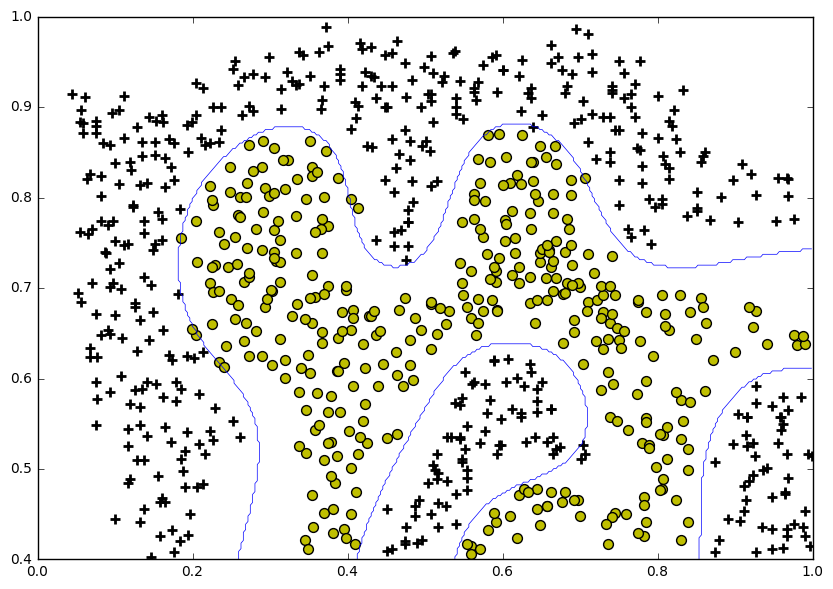

In [14]:
plot_dataset( data2['X'], data2['y'], '', '', '', '', 0, 1, 0.4, 1 )

xx1, xx2 = np.meshgrid( np.arange(0.0, 1.0, 0.003), np.arange(0.4, 1.0, 0.003) )
Z = clf_g.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')

1.2.3 Example Dataset 3

In [15]:
data3 = loadmat('ex6/ex6data3.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


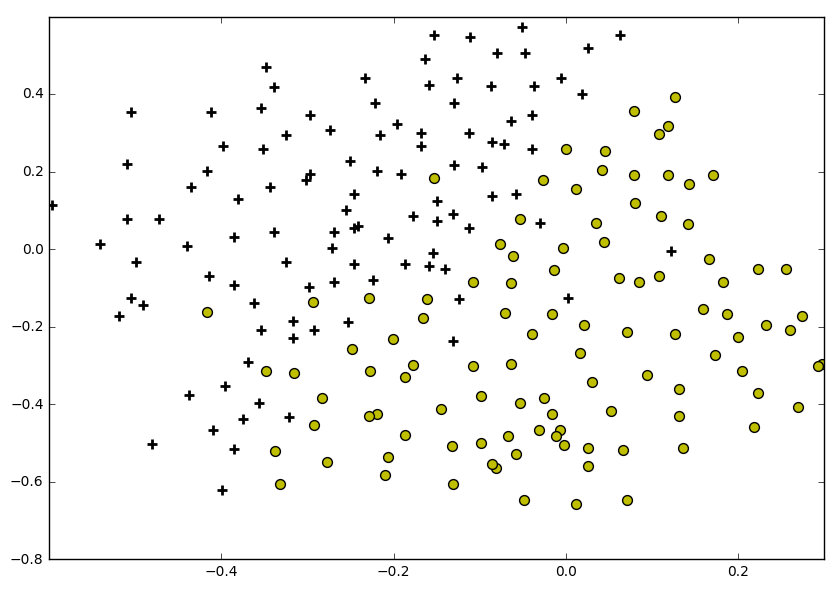

In [16]:
plot_dataset( data3['X'], data3['y'], '', '', '', '', -0.6, 0.3, -0.8, 0.6 )

In [17]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
c = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
val_errors = list()
sigma_c = list()
for s in sigma:
    for q in c:
        clf = svm.SVC(kernel = 'rbf', gamma = 1/(2*(s**2)), C = q, decision_function_shape = 'ovr')
        clf.fit( data3['X'], data3['y'].ravel() )
        val_errors.append( clf.score(data3['Xval'], data3['yval'].ravel()) )
        sigma_c.append( (s, q) )

In [18]:
ind = np.argmax(val_errors)
sigma_max, c_max = sigma_c[ind]
print(sigma_max, c_max)

0.1 1


In [19]:
clf_g3 = svm.SVC(kernel = 'rbf', gamma = 1/(2*(sigma_max)**2), C = c_max, decision_function_shape = 'ovr')
clf_g3.fit( data3['X'], data3['y'].ravel() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


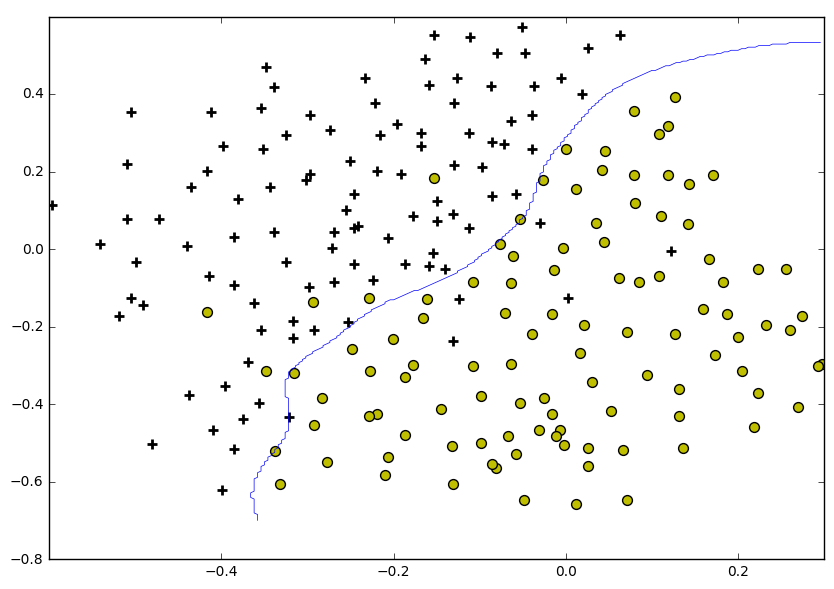

In [20]:
plot_dataset( data3['X'], data3['y'], '', '', '', '', -0.6, 0.3, -0.8, 0.6 )

xx1, xx2 = np.meshgrid( np.arange(-0.6, 0.3, 0.004), np.arange(-0.7, 0.6, 0.004) )
Z = clf_g3.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, [0.5], linewidths=0.5, colors='b')